# Задание на градиентный бустинг и стэкинг.

Для удобства проверки:
* Решение назовите `[Имя]_[Фамилия].ipynb`, например `Ivan_Ivanov.ipynb`.
* Ответы **и код** пишите сразу под вопросом.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

random_state = 12

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import LinearSVC

warnings.filterwarnings("ignore", category=ConvergenceWarning)

В задании будт использоваться датасет про качество вин. Будем использовать таблицу только для белых вин.

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Целевая переменная `quality`

In [3]:
import pandas as pd

In [ ]:
df = pd.read_csv("winequality-white.csv", sep=";")
X, y = df.iloc[:, :11], df["quality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state, stratify=y
)

### Исследование данных

|                       |                         |
|-----------------------|-------------------------|
| fixed acidity         | Не летучие кислоты      |
| volatile acidity      | Летучие кислоты         |
| citric acid           | Аскорбиновая кислота    |
| residual sugar        | Остаточный сахар        |
| chlorides             | Хлориды                 |
| free sulfur dioxide   | Свободные диоксиды серы |
| total sulfur dioxide  | Суммарные диоксиды серы |
| density               | Плотность               |
| pH                    | Кислотность             |
| sulphates             | Сульфаты                |
| alcohol               | Этиловый спирт          |

## 1.Постройте представленность признака `citric acid` (по оси Y) при каждом отклике (`quality`, по оси X). Воспользуйтесь функцией `seaborn.barplot`.
## В винах самого высокого качества этот признак должен быть больше или меньше?

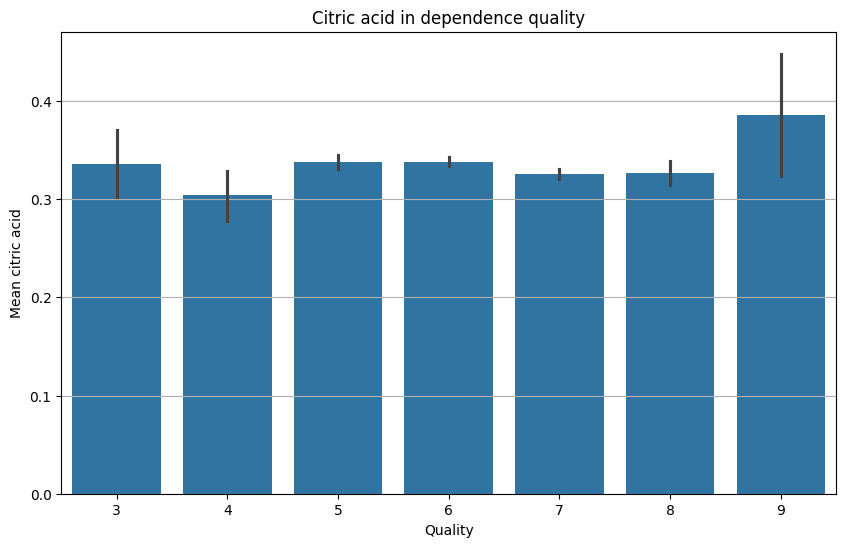

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.barplot(x=df.quality, y=df["citric acid"], estimator="mean")
plt.title("Citric acid in dependence quality")
plt.xlabel("Quality")
plt.ylabel("Mean citric acid")
plt.grid(axis="y")
plt.show()

ответ: В винах самого высокого качества этот признак должен быть больше

## 2.Постройте аналогичный график, но для `residual sugar`. Связано ли значение признака с целевой переменной?

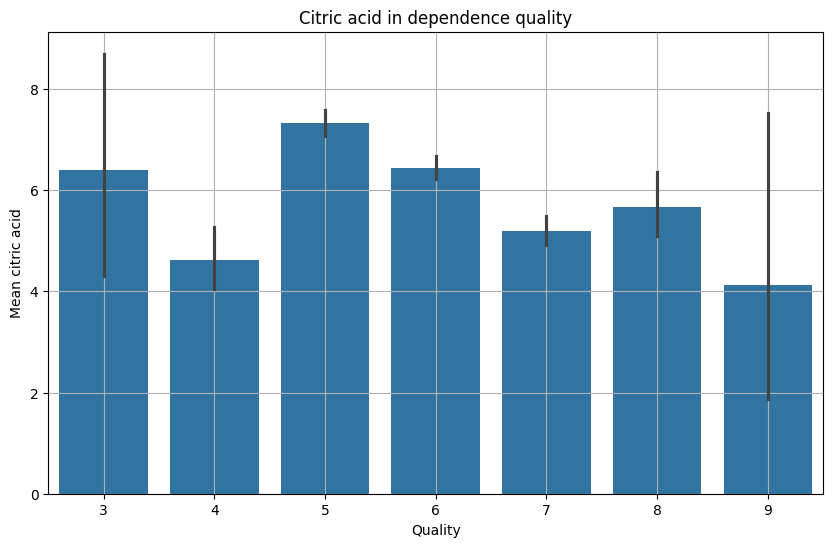

In [47]:
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.barplot(x=df.quality, y=df["residual sugar"], estimator="mean")
plt.title("Citric acid in dependence quality")
plt.xlabel("Quality")
plt.ylabel("Mean citric acid")
plt.grid()
plt.show()

ответ: На первый взгляд у лучшего вина этот признак в среднем меньше, однако там достаточно большая ошибка так что точно утверждать нельзя

## 3.Постройте таблицу корреляций признаков друг с другом. 
Используйте `df.corr(min_periods=5)`

In [13]:
corr_matrix = df.corr(min_periods=5)
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## 4.Какая пара признаков сильнее всего скоррелирована?

In [ ]:
corr_wo_diag = (corr_matrix - np.eye(corr_matrix.shape[0])).stack()
print(f"pair features: {corr_wo_diag.idxmax()}\nCorrelation: {corr_wo_diag.max():.3f}")

pair features: ('residual sugar', 'density')
Correlation: 0.839


## 5.Посчитайте точность для `GradientBoostingClassifier`.  

Используйте `n_estimators=400`,`max_depth=4`, `random_state=0`

Точность везде считаем на тестовых данных, выводим с двумя знаками после запятой, например 0.99. 

Можно использовать функцию `sklearn.metrics.accuracy_score`.

In [38]:
model = GradientBoostingClassifier(n_estimators=400, max_depth=4, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")

Accuracy : 0.64


## 6.Постройте график зависимости `error_rate` градиентного бустинга от количества базовых моделей от 1 до 400 c `max_depth=6`
Воспользуйтесь методом `.staged_predict`

In [ ]:
from sklearn.metrics import zero_one_loss

error_rate_list = []

model = GradientBoostingClassifier(n_estimators=400, max_depth=6, random_state=0)
model.fit(X_train, y_train)

error_rate_list = [
    zero_one_loss(y_test, y_pred) for y_pred in model.staged_predict(X_test)
]

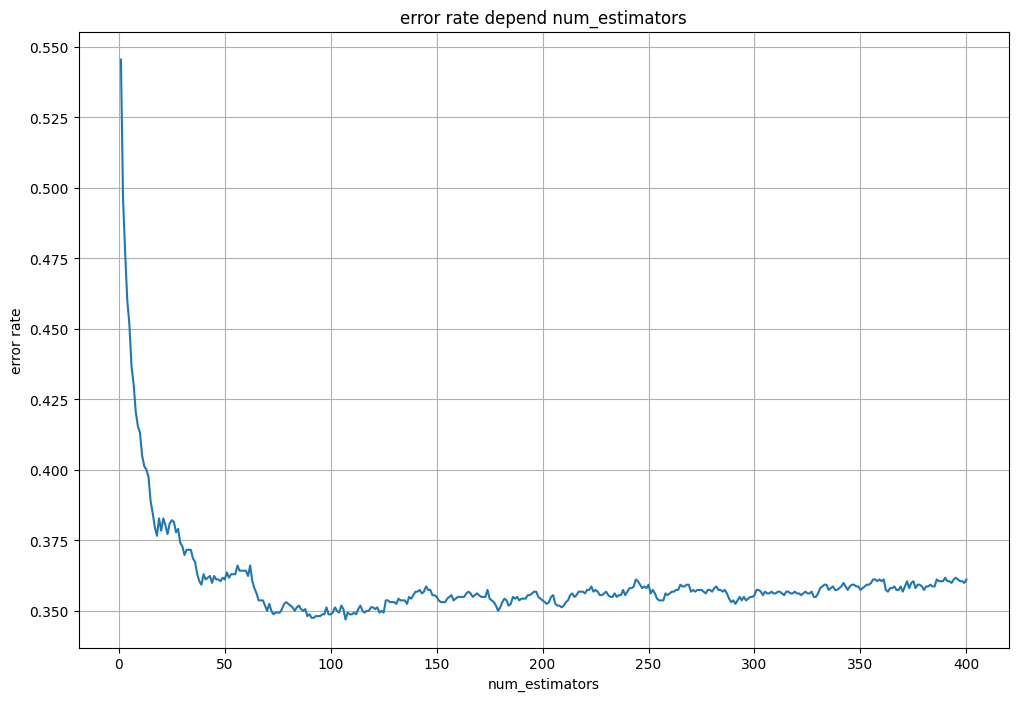

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(1, len(error_rate_list), len(error_rate_list)), error_rate_list)
plt.title("error rate depend num_estimators")
plt.xlabel("num_estimators")
plt.ylabel("error rate")
plt.grid()
plt.show()

## 7.Найдите наилучшие параметры и точность GradientBoostingClassifier
Используйте класс `GridSearchCV` и сетку значений:

`{
"learning_rate": [0.5],
"n_estimators": [200, 400],
"max_depth": [2, 3],
"subsample": [0.5, 0.8, 1],
"max_features":[0.5, 0.8, 1]
}`

Для задействования всех ядер процессора, используйте `n_jobs=-1`.

In [57]:
model = GradientBoostingClassifier(random_state=0)

param_grid = {
    "learning_rate": [0.5],
    "n_estimators": [200, 400],
    "max_depth": [2, 3],
    "subsample": [0.5, 0.8, 1],
    "max_features": [0.5, 0.8, 1],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=4,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5], 'max_depth': [2, 3],
                         'max_features': [0.5, 0.8, 1],
                         'n_estimators': [200, 400],
                         'subsample': [0.5, 0.8, 1]},
             scoring='accuracy')

In [58]:
best_params_ = grid_search.best_params_
print(f"Best parameters: {best_params_}")
print(f"Best cv score: {grid_search.best_score_:.3f}")

Best parameters: {'learning_rate': 0.5, 'max_depth': 3, 'max_features': 0.8, 'n_estimators': 200, 'subsample': 0.8}
Best cv score: 0.582


In [59]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Accuracy on test: {accuracy_score(y_test, y_pred):.3f}")

Accuracy on test: 0.550


## 8.Синхронно измените `learning_rate` на `learning_rate/10` и `n_estimators` на `n_estimators*10`
## Выведите точность новой модели.

In [60]:
best_params_["learning_rate"] /= 10
best_params_["n_estimators"] *= 10

In [121]:
best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'max_features': 0.8,
 'n_estimators': 2000,
 'subsample': 0.8}

In [61]:
model_new_lr_n_est = GradientBoostingClassifier(random_state=0, **best_params_)
model_new_lr_n_est.fit(X_train, y_train)
y_pred_new_lr_n_est = model_new_lr_n_est.predict(X_test)

In [62]:
print(f"Accuracy on test: {accuracy_score(y_test, y_pred_new_lr_n_est):.2f}")

Accuracy on test: 0.64


## 9.Постройте график важноcти признаков в бустинге. Какой признак самый важный?
Используйте свойство `feature_importances_`.

In [63]:
feature_importances = model_new_lr_n_est.feature_importances_

In [64]:
feature_importances

array([0.05911634, 0.10369317, 0.06775051, 0.09324789, 0.07958928,
       0.09175882, 0.09123876, 0.11851208, 0.07764061, 0.06679644,
       0.1506561 ])

In [76]:
fi = pd.DataFrame(feature_importances, index=X_train.columns, columns=["value"])
fi

,value
fixed acidity,0.059116
volatile acidity,0.103693
citric acid,0.067751
residual sugar,0.093248
chlorides,0.079589
free sulfur dioxide,0.091759
total sulfur dioxide,0.091239
density,0.118512
pH,0.077641
sulphates,0.066796


In [91]:
fi = fi.sort_values("value", ascending=True)
fi

,value
fixed acidity,0.059116
sulphates,0.066796
citric acid,0.067751
pH,0.077641
chlorides,0.079589
total sulfur dioxide,0.091239
free sulfur dioxide,0.091759
residual sugar,0.093248
volatile acidity,0.103693
density,0.118512


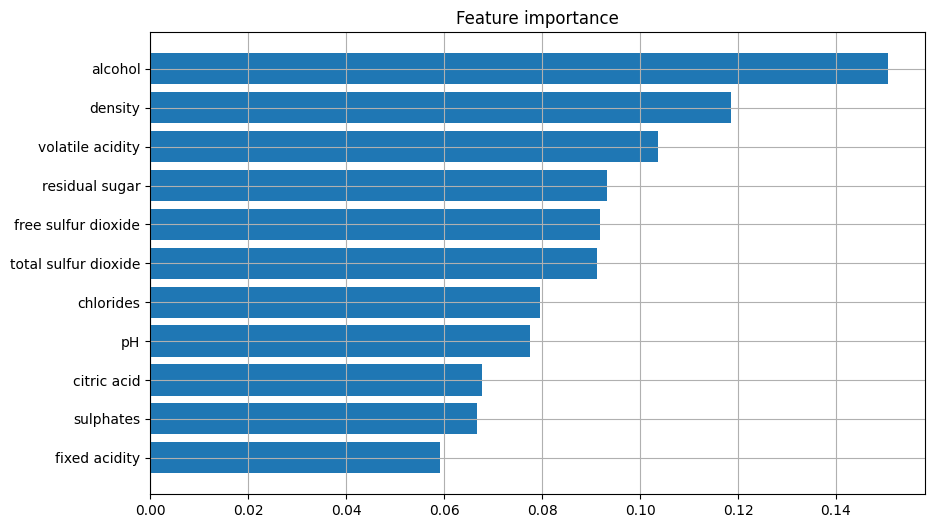

In [93]:
plt.figure(figsize=(10, 6))
plt.barh(
    fi.index,
    fi.value,
)
plt.grid()
plt.title("Feature importance")
plt.show()

In [109]:
print(f"Best feature\n{fi.iloc[-1].name} : {fi.iloc[-1].values[0]:.3f}")

Best feature
alcohol : 0.151


## 10.Выведите наилучшую точность для `KNeighborsClassifier`

Используйте сетку параметров:
`
{
"n_neighbors": [1,5,7,10,20,30,40],
"weights": ["uniform", "distance"],
"leaf_size": [25, 30, 25]
}
`

In [110]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": [1, 5, 7, 10, 20, 30, 40],
    "weights": ["uniform", "distance"],
    "leaf_size": [25, 30, 35],
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_
best_accuracy_knn = grid_search_knn.best_score_

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [111]:
print(f"knn: Best parameters: {best_params_knn}")
print(f"knn: Best cv score: {best_accuracy_knn:.3f}")

knn: Best parameters: {'leaf_size': 25, 'n_neighbors': 40, 'weights': 'distance'}
knn: Best cv score: 0.576


In [112]:
y_pred_knn = best_model_knn.predict(X_test)
print(f"knn: Accuracy on test: {accuracy_score(y_test, y_pred_knn):.3f}")

knn: Accuracy on test: 0.588


## 11.Выведите наилучшую точность для `DecisionTreeClassifier`

Используйте сетку параметров:
`
{
"max_depth": [2, 3, 4,7,10,15],
'max_features' : [1,3,5,11]
}
`

In [113]:
param_grid = {"max_depth": [2, 3, 4, 7, 10, 15], "max_features": [1, 3, 5, 11]}

dtc = DecisionTreeClassifier(random_state=0)

grid_search_dec_tree = GridSearchCV(
    estimator=dtc, param_grid=param_grid, n_jobs=-1, cv=5
)
grid_search_dec_tree.fit(X_train, y_train)

best_params_tree = grid_search_dec_tree.best_params_
best_model_tree = grid_search_dec_tree.best_estimator_
best_accuracy_tree = grid_search_dec_tree.best_score_

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [114]:
print(f"dec_tree: Best parameters: {best_params_tree}")
print(f"dec_tree: Best cv score: {best_accuracy_tree:.3f}")

dec_tree: Best parameters: {'max_depth': 15, 'max_features': 11}
dec_tree: Best cv score: 0.568


In [116]:
y_pred_tree = best_model_tree.predict(X_test)
print(f"dec_tree: Accuracy on test: {accuracy_score(y_test, y_pred_tree):.3f}")

dec_tree: Accuracy on test: 0.574


## 12.Выведите наилучшую точность для `LinearSVC`
Используйте сетку параметров:
`{'C':10.0**np.arange(-4,4)}`

In [ ]:
param_grid = {"C": 10.0 ** np.arange(-4, 4)}

svc = LinearSVC(random_state=0, max_iter=10000)

grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search_svc.fit(X_train, y_train)

best_params_svc = grid_search.best_params_
best_model_svc = grid_search.best_estimator_
best_accuracy_svc = grid_search.best_score_

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [118]:
print(f"dec_tree: Best parameters: {best_params_svc}")
print(f"dec_tree: Best cv score: {best_accuracy_svc:.3f}")

dec_tree: Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.8, 'n_estimators': 2000, 'subsample': 0.8}
dec_tree: Best cv score: 0.582


In [120]:
y_pred_svc = best_model_svc.predict(X_test)
print(f"dec_tree: Accuracy on test: {accuracy_score(y_test, y_pred_svc):.3f}")

dec_tree: Accuracy on test: 0.550


## 13.Обучите ансамбль на трех моделях с их наилучшими параметрами и выведите его точность.

Используйте `sklearn.ensemble.StackingClassifier`

In [ ]:
base_estimators = [
    ("knn", KNeighborsClassifier(**best_params_knn)),
    (
        "decision_tree",
        DecisionTreeClassifier(random_state=0, **best_params_tree),
    ),
    (
        "gradient_boosting",
        GradientBoostingClassifier(random_state=0, **best_params_),
    ),
]

stacking_clf = StackingClassifier(
    estimators=base_estimators, final_estimator=GradientBoostingClassifier()
)
stacking_clf.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy of ansible: 0.66


In [131]:
y_pred_stack = stacking_clf.predict(X_test)
print(f"Accuracy of ansible: {accuracy_score(y_test, y_pred):.3f}")

Accuracy of ansible: 0.662


## 14.Предложите алгоритм, дающий более высокую точность

In [132]:
from catboost import CatBoostClassifier

In [139]:
catboost_model = CatBoostClassifier(
    iterations=1000, depth=10, learning_rate=0.2, random_state=0
)

catboost_model.fit(X_train, y_train, verbose=50)

y_pred_catboost = catboost_model.predict(X_test)

catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print(f"Accuracy of catboost: {catboost_accuracy:.2f}")

0:	learn: 1.7257156	total: 24ms	remaining: 23.9s
50:	learn: 0.5845255	total: 999ms	remaining: 18.6s
100:	learn: 0.3406237	total: 1.98s	remaining: 17.6s
150:	learn: 0.2243006	total: 2.97s	remaining: 16.7s
200:	learn: 0.1567163	total: 4.02s	remaining: 16s
250:	learn: 0.1177062	total: 5.03s	remaining: 15s
300:	learn: 0.0925034	total: 6.01s	remaining: 14s
350:	learn: 0.0757720	total: 7.07s	remaining: 13.1s
400:	learn: 0.0636900	total: 8.03s	remaining: 12s
450:	learn: 0.0538463	total: 9.15s	remaining: 11.1s
500:	learn: 0.0465621	total: 10.2s	remaining: 10.2s
550:	learn: 0.0409243	total: 11.2s	remaining: 9.11s
600:	learn: 0.0364617	total: 12.2s	remaining: 8.08s
650:	learn: 0.0328135	total: 13.1s	remaining: 7.04s
700:	learn: 0.0297900	total: 14.1s	remaining: 6.02s
750:	learn: 0.0271987	total: 15.1s	remaining: 5s
800:	learn: 0.0249601	total: 16.1s	remaining: 3.99s
850:	learn: 0.0230928	total: 17s	remaining: 2.98s
900:	learn: 0.0213829	total: 18s	remaining: 1.98s
950:	learn: 0.0199611	total: 19

In [140]:
y_pred = catboost_model.predict(X_test)

print(f"Accuracy of catboost test: {accuracy_score(y_test, y_pred_catboost):.3f}")

Accuracy of catboost test: 0.668
